In [1]:
import enhancement_analysis as ea
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

In [2]:
style = {'description_width': 'initial'}

folder_path_w = widgets.Text(
    value='20181220',
    placeholder='This Notebook Directory/...',
    description='Folder path',
    disabled=False,
    style=style
)
start_num_w = widgets.IntText(
    value=22,
    description='Starting File',
    disabled=False,
    style=style
)
stop_num_w = widgets.IntText(
    value=45,
    description='Ending File',
    disabled=False,
    style=style
)
start_int_w = widgets.FloatText(
    value=0.00,
    description='Integration Start (ms)',
    disabled=False,
    style=style
)
stop_int_w = widgets.FloatText(
    value=1,
    description='Integration End (ms)',
    disabled=False,
    style=style
)
print_w = widgets.Checkbox(
    value=False,
    description='Print Output?',
    disabled=False
)
indep_var_w = widgets.Text(
    placeholder='Separated by commas',
    description='Independent Variable',
    disabled=False,
    style=style
)

def wrapper_getRawDataset(w):
        print('Generating raw data from ',folder_path_w.value)
        #results = processData(folder_path_w.value,start_num_w.value,stop_num_w.value,start_setpnt_w.value,stop_setpnt_w.value,setpnt_int_w.value,print_w.value)
        results = ea.getRawDataset(folder_path_w.value,start_num_w.value,stop_num_w.value,print_w.value)
        w.value = results
        print('Done')

def wrapper_calcODs(w):
        print('Calculating ODs from ',folder_path_w.value)
        #results = processData(folder_path_w.value,start_num_w.value,stop_num_w.value,start_setpnt_w.value,stop_setpnt_w.value,setpnt_int_w.value,print_w.value)
        results = ea.calculateODs(*rawdata_lb.value)
        w.value = results
        print('Done')
        return

def wrapper_intODs(w):
        print('Integrating and processing ODs from ',folder_path_w.value)
        if indep_var_w.value == '':
            iv = False
        else:
            iv = [float(num_string.strip()) for num_string in indep_var_w.value.split(',')]
        results = ea.integrateODs(*calcODs_lb.value, indep_var = iv, start_int=start_int_w.value,stop_int=stop_int_w.value)
        w.value = results
        print('Done')
        return

def widget_layout():
    r0=widgets.HBox([folder_path_w])
    r1 = widgets.HBox([start_num_w,stop_num_w])
    r2 = widgets.HBox([rawdata_lb,print_w])
    r3 = widgets.HBox([calcODs_lb,print_w])
    r4a = widgets.HBox([indep_var_w])
    r4b = widgets.HBox([start_int_w,stop_int_w])
    r5 = widgets.HBox([intODs_lb,print_w])
    #display(widgets.VBox([r0,r1,r2,r3,r4a,r4b,r5]))
    raw_settings = widgets.Accordion(children=[widgets.VBox([r0,r1])])
    raw_settings.set_title(0, 'Raw Data Settings')
    display(raw_settings)
    display(widgets.VBox([r2,r3]))
    analysis_settings = widgets.Accordion(children=[widgets.VBox([r4a,r4b])])
    analysis_settings.set_title(0, 'Analysis Settings')
    display(analysis_settings)
    display(r5)

rawdata_lb = ea.LoadedButton(description="Get Raw Dataset", value=[])
rawdata_lb.on_click(wrapper_getRawDataset)
calcODs_lb = ea.LoadedButton(description="Calculate ODs", value=[])
calcODs_lb.on_click(wrapper_calcODs)
intODs_lb = ea.LoadedButton(description="Integrate ODs", value=[])
intODs_lb.on_click(wrapper_intODs)

Accordion(children=(VBox(children=(HBox(children=(Text(value='20181220', description='Folder path', placeholde…

Accordion(children=(VBox(children=(HBox(children=(Text(value='', description='Independent Variable', placehold…

Generating raw data from  20181220


FloatProgress(value=0.0, max=1.0)

Done
Calculating ODs from  20181220


FloatProgress(value=0.0, max=1.0)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Done


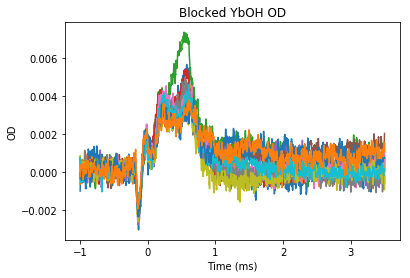

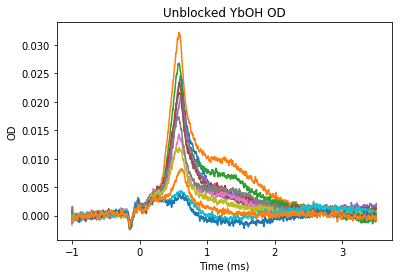

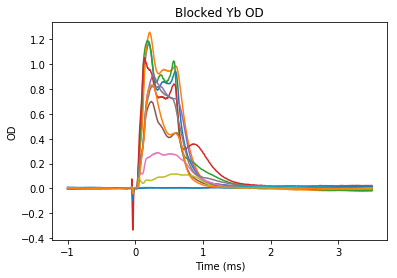

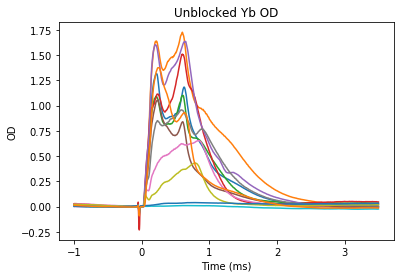

Integrating and processing ODs from  20181220


FloatProgress(value=0.0, max=1.0)

Done


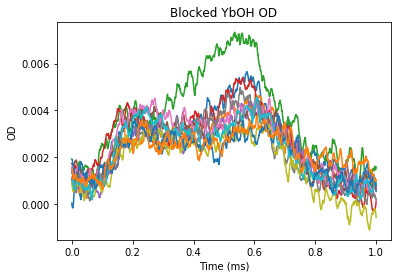

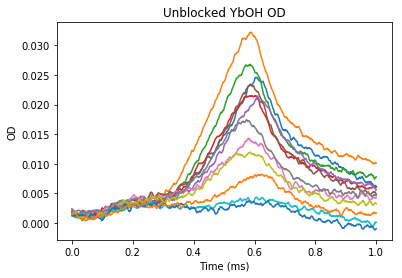

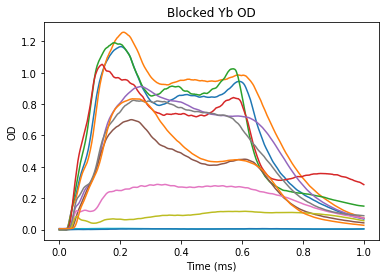

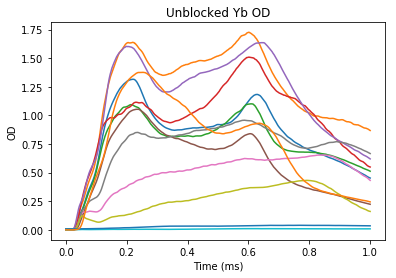

In [3]:
widget_layout()

In [9]:
data=intODs_lb.value
YbOH_enhance=data[0]
Yb_enhance=data[1]
freq=data[2]
YbOH_uB_OD=data[3]
YbOH_B_OD=data[4]
Yb_uB_OD=data[5]
Yb_B_OD=data[6]

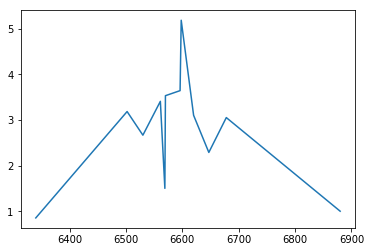

In [10]:
plt.plot(freq,YbOH_enhance)

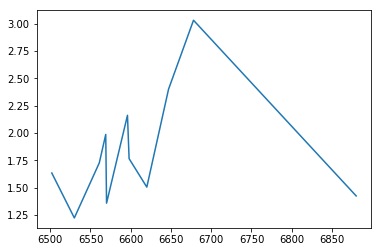

In [19]:
plt.plot(freq[1:],Yb_enhance[1:])

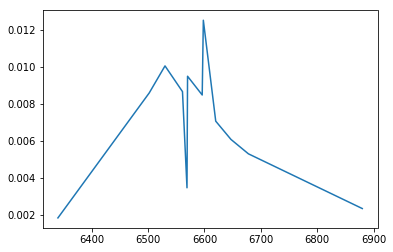

In [14]:
plt.plot(freq,YbOH_uB_OD)


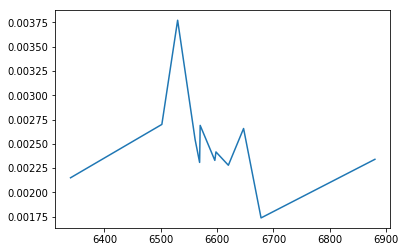

In [15]:
plt.plot(freq,YbOH_B_OD)

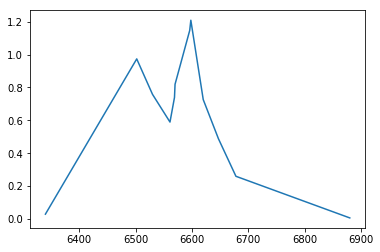

In [16]:
plt.plot(freq,Yb_uB_OD)

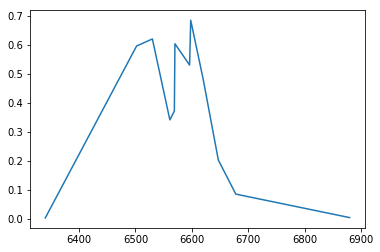

In [17]:
plt.plot(freq,Yb_B_OD)